# Convolutional Neural Networks (CNNs)

## What is a CNN?

* Convolutional Neural Netowrk also known as a CNN or ConvNet.
* CNN is an ANN that has so far been most popularly used for analyzing images for CV tasks.
* Although image analysis has been the most wide spread use of CNNS, they can also be used for other data analysis or classification as well.
* We can think of a CNN as an ANN that has some type of specialization for being able to pick out or detect patterns.
* This pattern detection is what makes CNNs so useful for image analysis.
* CNNs have hidden layers called convolutional layers, and these layers are what make a CNN a CNN.
* In traditional feedforward neural networks, each neuron in the input layer is connected to every output neuron in the next layer – we call this a fullyconnected (FC) layer.
* However, in CNNs, we don’t use FC layers until the very last layer(s) in the network. We can thus define a CNN as a neural network that swaps in a specialized “convolutional” layer in place of “fully-connected” layer for at least one of the layers in the network.
* A nonlinear activation function, such as ReLU, is then applied to the output of these convolutions and the process of convolution => activation continues (along with a mixture of other layer types to help reduce the width and height of the input volume and help reduce overfitting) until we finally reach the end of the network and apply one or two FC layers where we can obtain our final output classifications.
* Each layer in a CNN applies a different set of filters, typically hundreds or thousands of them, and combines the results, feeding the output into the next layer in the network. During training, a **CNN automatically learns the values for these filters**.

## Filters and convolution operations

* CNN are able to detect patterns in images.
* With each convolutional layer, we need to specify the number of filters the layer should have. 
* These filters are actually what detect the patterns.

### Patterns

* Think about how much may be going on in any single image. Multiple edges, shapes, textures, objects, etc. These are what we mean by patterns.
* Some patterns are:
  * edges
  * shapes
  * textures
  * curves
  * objects
  * colors
* One type of pattern that a filter can detect in an image is edges, so this filter would be called an edge detector.
* Aside from edges, some filters may detect corners. Some may detect circles. Others, squares. Now these simple, and kind of geometric, filters are what we’d see at the start of a convolutional neural network.

![](imgs/cnn_patterns.png)

* The deeper the network goes, the more sophisticated the filters become. In later layers, rather than edges and simple shapes, our filters may be able to detect specific objects like eyes, ears, hair or fur, feathers, scales, and beaks.
* In even deeper layers, the filters are able to detect even more sophisticated objects like full dogs, cats, lizards, and birds.

![](imgs/cnn_deeper.png)

* [Convolution Example - fast.ai](docs/conv-example.xlsx)

### Filters (pattern detectors)

* Suppose we have a convolutional neural network that is accepting images of handwritten digits (like from the [MNIST data set](http://yann.lecun.com/exdb/mnist/)) and our network is classifying them into their respective categories of whether the image is of a 1, 2, 3, etc.

![](imgs/mnist_dataset.png)

* Let’s now assume that the first hidden layer in our model is a convolutional layer. As mentioned earlier, when adding a convolutional layer to a model, we also have to specify how many filters we want the layer to have.
* The number of filters determine the number of output channels.
* A filter can technically just be thought of as a relatively small matrix (tensor), for which, we decide the number of rows and columns this matrix has, and the values within this matrix are initialized with random numbers.
* For this first convolutional layer of ours, we’re going to specify that we want the layer to contain one filter of size 3x3.

### Convolutional layer

* Look at an example animation of the convolution operation:

![](imgs/same_padding_no_strides.gif)

* This animation showcases the convolution process without numbers. We have an input channel in blue on the bottom. A convolutional filter shaded on the bottom that is sliding across the input channel, and a green output channel:
  * Blue (bottom): Input channel.
  * Shaded (on top of blue): 3x3 convolutional filter.
  * Green (top): Output channel.
* For each position on the blue input channel, the 3x3 filter does a computation that maps the shaded part of the blue input channel to the corresponding shaded part of the green output channel.
* This convolutional layer receives an input channel, and the filter will slide over each 3x3 set of pixels of the input itself until it’s slid over every 3x3 block of pixels from the entire image.

### Convolution operation

* This sliding is referred to as *convolving*. This filter is going to convolve across each 3x3 block of pixels from the input.
* The blue input channel is a matrix representation of an image from the MNIST dataset. The values in this matrix are the individual pixels from the image. These images are grayscale images, and so we only have a single input channel.
* This input will be passed to a convolutional layer.
* We’ve specified the first convolutional layer to only have one filter, and this filter is going to convolve across each 3x3 block of pixels from the input. When the filter lands on its first 3x3 block of pixels, the dot product of the filter itself with the 3x3 block of pixels from the input will be computed and stored. This will occur for each 3x3 block of pixels that the filter convolves.
* After this filter has convolved the entire input, we’ll be left with a new representation of our input, which is now stored in the output channel. This output channel is called a [feature map](http://deeplizard.com/learn/video/k6ZF1TSniYk).
* This green output channel becomes the input channel to the next layer as input, and then this process that we just went through with the filter will happen to this new output channel with the next layer’s filters.
* This was just a very simple illustration, but as mentioned earlier, we can think of these filters as pattern detectors.

## Input and output channels

* Suppose that this grayscale image (single color channel) of a seven from the MNIST data set is our input:

![](imgs/mnist_7.png)

* Let’s suppose that we have four 3x3 filters for our first convolutional layer, and these filters are filled with the values below. These values can be represented visually by having -1s correspond to black, 1s correspond to white, and 0s correspond to grey.

![](imgs/4_filters_3x3.png)

#### *Convolutional Layer with 4 filters*

* If we convolve our original image of a seven with each of these four filters individually, this is what the output would look like for each filter:

![](imgs/mnist_7_filters_convolve.png)

#### *Output channels from the Convolutional Layer*

* We can see that all four of these filters are detecting edges. In the output channels, the brightest pixels can be interpreted as what the filter has detected. In the first one, we can see detects top horizontal edges of the seven, and that’s indicated by the brightest pixels (white).
* The second detects left vertical edges, again being displayed with the brightest pixels. The third detects bottom horizontal edges, and the fourth detects right vertical edges.

* These filters, as we mentioned before, are really basic and just detect edges. These are filters we may see towards the start of a convolutional neural network. More complex filters would be located deeper in the network and would gradually be able to detect more sophisticated patterns like the ones shown here:

![](imgs/cnn_layer_2_filters.png)

* We can see the shapes that the filters on the left detected from the images on the right. We can see circles, curves and corners. As we go further into our layers, the filters are able to detect much more complex patterns like dog faces or bird legs shown here:

![](imgs/cnn_layer_4_filters.png)

* The amazing thing is that the pattern detectors are derived automatically by the network. The filter values start out with random values, and the values change as the network learns during training. The pattern detecting capability of the filters emerges automatically.
* In the past, computer vision experts would develop filters (pattern detectors) manually. One example of this is the [Sobel filter](https://en.wikipedia.org/wiki/Sobel_operator), an edge detector. However, with deep learning, we can learn these filters automatically using neural networks!

## CNN Building Blocks

### Layer types

* The are many type of layers used to buid CNN, the most common are:
  * Convolutional (CONV).
  * Activation (ACT or RELU, where we use the same or the actual activation function).
  * Pooling (POOL).
  * Fully-connected (FC).
  * Batch normalization (BN).
  * Dropout (DO).
  
##  - Convolutional Layers

* The CONV layer is the core building block of a Convolutional Neural Network.
* The CONV layer parameters consist of a set of *K* learnable filters (i.e., “kernels”), where each filter has a width and a height, and are nearly always square.
* These filters are small (in terms of their spatial dimensions) but extend throughout the full depth of the volume.
* For inputs to the CNN, the depth is the number of channels in the image (i.e., a depth of three when working with RGB images, one for each channel). For volumes deeper in the network, the depth will be the number of filters applied in the previous layer.
* At this point we have explained the connectivity of neurons in the input volume, but not the arrangement or size of the output volume. There are three parameters that control the size of an output volume: the **depth**, **stride**, and **zero-padding size**.

### Depth

* The depth of an output volume controls the number of neurons (i.e., filters) in the CONV layer that connect to a local region of the input volume.
* Each filter produces an activation map that “activates” in the presence of oriented edges or blobs or color.
* For a given CONV layer, the depth of the activation map will be *K*, or simply the number of filters we are learning in the current layer.

### Stride

* Stride controls how the filter convolves around the input volume.
* When creating our CONV layers we normally use a stride step size S of either S=1 or S=2.
* Smaller strides will lead to overlapping receptive fields and larger output volumes. Conversely, larger strides will result in less overlapping receptive fields and smaller output volumes.

![](imgs/cnn_strides.png)

* We can see how convolution layers can be used to reduce the spatial dimensions of the input volumes simply by changing the stride of the kernel.
* Convolutional layers and pooling layers are the primary methods to reduce spatial input size.

### Zero-padding

* What happens when you apply three 5x5x3 filters to a 32x32x3 input volume? The output volume would be 28x28x3.Notice that the spatial dimensions decrease. 
* As we keep applying conv layers, the size of the volume will decrease faster than we would like.
* In the early layers of our network, we want to preserve as much information about the original input volume so that we can extract those low level features.
* Using zero-padding, we can “pad” our input along the borders such that our output volume size matches our input volume size. The amount of padding we apply is controlled by the parameter *P*.

![](imgs/cnn_zero_padding.png)

## - Activation Layers

After each CONV layer in a CNN, we apply a nonlinear activation function, such as ReLU, ELU, or any of the other Leaky ReLU variants mentioned in ANNs.

## - Pooling Layers

* There are two methods to reduce the size of an input volume – CONV layers with a stride > 1 and POOL layers.
* It is common to insert POOL layers in-between consecutive CONV layers in a CNN architectures: 
  * **INPUT => CONV => RELU => POOL => CONV => RELU => POOL => FC**
* The primary function of the POOL layer is to progressively reduce the spatial size (i.e., width and height) of the input volume. Doing this allows us to reduce the amount of parameters and computation in the network – pooling also helps us control overfitting.
* POOL layers operate on each of the depth slices of an input independently using either the max or average function.
* Max pooling is typically done in the middle of the CNN architecture to reduce spatial size, whereas average pooling is normally used as the final layer of the network (e.x., GoogLeNet, SqueezeNet, ResNet) where we wish to avoid using FC layers entirely.
* The most common type of POOL layer is max pooling, although this trend is changing with the introduction of more exotic micro-architectures.

![](imgs/cnn_pooling.png)

**To POOL or CONV?**

* In their 2014 paper, *[Striving for Simplicity: The All Convolutional Net](https://arxiv.org/abs/1412.6806)* recommend discarding the POOL layer entirely and simply relying on CONV layers with a larger stride to handle downsampling the spatial dimensions of the volume.
* Their work demonstrated this approach works very well on a variety of datasets, including CIFAR-10 (small images, low number of classes) and ImageNet (large input images, 1.000 classes). This trend continues with the ResNet architecture which uses CONV layers for downsampling as well.
* It’s becoming increasingly more common to *not* use POOL layers in the middle of the network architecture and only use average pooling at the end of the network if FC layers are to be avoided.

## - Fully-connected Layers

* Neurons in FC layers are fully-connected to all activations in the previous layer, as is the standard for feedforward neural networks.
* FC layers are always placed at the end of the network (i.e., we don’t apply a CONV layer, then an FC layer, followed by another CONV) layer.
* It’s common to use one or two FC layers prior to applying the softmax classifier, as the following (simplified) architecture demonstrates:
  * **INPUT => CONV => RELU => POOL => CONV => RELU => POOL => FC => FC**

## - Batch Normalization

* Batch normalization layers (or BN for short), as the name suggests, are used to normalize the activations of a given input volume before passing it into the next layer in the network.
* BN has been shown to be extremely effective at reducing the number of epochs it takes to train a NN.
* BN also has the added benefit of helping “stabilize” training, allowing for a larger variety of learning rates and regularization strengths.

**So, Where Do the Batch Normalization Layers Go?**

*PyImageSearch book* recommends placing the BN after the RELU yields slightly higher accuracy and lower loss.

  * **INPUT => CONV => RELU => BN ...**
  
## - Dropout

* Dropout is actually a form of regularization that aims to help prevent overfitting by increasing testing accuracy, perhaps at the expense of training accuracy.
* For each mini-batch in our training set, dropout layers, with probability *p*, randomly disconnect inputs from the preceding layer to the next layer in the network architecture.
* The reason we apply dropout is to reduce overfitting by explicitly altering the network architecture at training time.
* Randomly dropping connections ensures that no single node in the network is responsible for “activating” when presented with a given pattern.
* Instead, dropout ensures there are multiple, redundant nodes that will activate when presented with similar inputs – this in turn helps our model to generalize.
* It is most common to place dropout layers with p=0.5 *in-between* FC layers of an architecture where the final FC layer is assumed to be our softmax classifier:
  * **... CONV => RELU => POOL => FC => DO => FC => DO => FC**

![](imgs/cnn_dropout.png)

## ShallowNet on CIFAR-10

**Network Architecture:** *INPUT => CONV => RELU => FC*

### ShallowNet Class

In [1]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K

class ShallowNet:
    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model along with the input shape to be "channels last"
        model = Sequential()
        inputShape = (height, width, depth)

        # if we are using "channels first", update the input shape
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
        
        # define the first (and only) CONV => RELU layer
        model.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape))
        model.add(Activation("relu"))

        # softmax classifier
        model.add(Flatten())
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        # return the constructed network architecture
        return model

Using TensorFlow backend.


### ShallowNet CIFAR-10

[INFO] loading CIFAR-10 data...
[INFO] compiling the model...
[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 83s 2ms/step - loss: 1.7964 - acc: 0.3679 - val_loss: 1.6156 - val_acc: 0.4363
Epoch 2/40
50000/50000 [==============================] - 81s 2ms/step - loss: 1.5554 - acc: 0.4560 - val_loss: 1.6656 - val_acc: 0.3910
Epoch 3/40
50000/50000 [==============================] - 82s 2ms/step - loss: 1.4336 - acc: 0.4998 - val_loss: 1.3915 - val_acc: 0.5011
Epoch 4/40
50000/50000 [==============================] - 82s 2ms/step - loss: 1.3359 - acc: 0.5310 - val_loss: 1.3593 - val_acc: 0.5144
Epoch 5/40
50000/50000 [==============================] - 85s 2ms/step - loss: 1.2725 - acc: 0.5544 - val_loss: 1.2794 - val_acc: 0.5519
Epoch 6/40
50000/50000 [==============================] - 89s 2ms/step - loss: 1.2297 - acc: 0.5706 - val_loss: 1.2723 - val_acc: 0.5503
Epoch 7/40
50000/50000 [===============

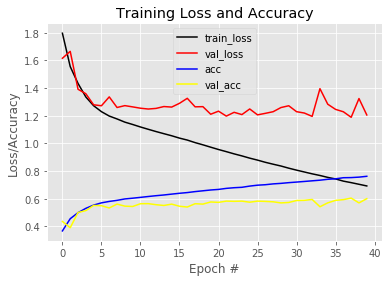

In [2]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras.optimizers import SGD
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# load the training and testing data, the scale it into the range [0, 1]
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# initialize the optimizer and model
print("[INFO] compiling the model...")
opt = SGD(lr=0.01)
model = ShallowNet.build(width=32, height=32, depth=3, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# train the network
print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=32, epochs=40, verbose=1)

# evaluate the network
print("[INFO] evaluating the network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 40), H.history["loss"], color="black", label="train_loss")
plt.plot(np.arange(0, 40), H.history["val_loss"], color="red", label="val_loss")
plt.plot(np.arange(0, 40), H.history["acc"], color="blue", label="acc")
plt.plot(np.arange(0, 40), H.history["val_acc"], color="yellow", label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

# References



* **Deep Lizard**:
  * Convolutional Neural Networks (CNNs) explained: http://deeplizard.com/learn/video/YRhxdVk_sIs
* **PyImageSearch**:
  * Book "Deep Learning for Computer Vision - Starter Bundle": https://www.pyimagesearch.com/deep-learning-computer-vision-python-book/
* **fast.ai**:
  * Course Practical Deep Learning for Coders - Lesson 3 (v2018): http://course18.fast.ai/lessons/lesson3.html